Kelompok 6
- Nadya Cindy Putri 12320019
- Iqram Haris Fahromi 12320021
- Cut La Tansa Millata Hanifah 12320022

In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# ubah theme
plt.style.use("bmh")

In [2]:
# import data
source_df = pd.read_excel("source.xlsx")
mag_df = pd.read_excel("magnitude.xlsx")
tobs_df = pd.read_excel("titik_observasi.xlsx")

### Display Data

In [3]:
# data sources
source_df

,source,long,lat,a_rate,z
0,Source 1,106.0,7.4,0.010524,25
1,Source 2,106.6,7.4,0.008314,25
2,Source 3,107.1,8.1,0.007411,25
3,Source 4,105.9,8.8,0.005932,25
4,Source 5,108.1,9.7,0.006490,25


In [4]:
# data magnitude
mag_df.head()

,Mag,N
0,8.1,9
1,8.0,9
2,7.9,9
3,7.8,9
4,7.7,9


In [5]:
# data titik observasi
tobs_df

,long,lat
0,106.367412,-8.691137


# Perhitungan B Value

In [6]:
# melakukan log10 untuk setiap N
mag_df["logN"] = np.log10(mag_df.N)

In [7]:
# display hasil
mag_df.head()

,Mag,N,logN
0,8.1,9,0.954243
1,8.0,9,0.954243
2,7.9,9,0.954243
3,7.8,9,0.954243
4,7.7,9,0.954243


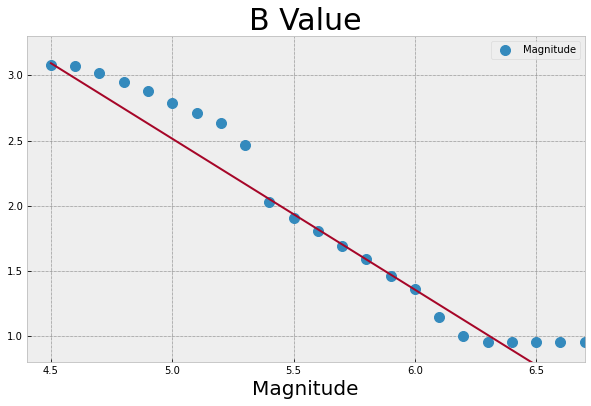

Koefisien regresi / B-Value:  0.6569221126661999
Intercept:  5.69844668039044


In [56]:
# melakukan assign x dan y
x = mag_df.Mag
y = mag_df.logN

# mengganti ukuran plot
plt.figure(figsize=(10,6))

# menghitung b value
slope, intercept = np.polyfit(x, y, 1)
b_value = abs(slope)

# mengubah batas x dan y
plt.xlim(4.4, 6.7)
plt.ylim(0.8, 3.3)

# melakukan plot
plt.plot(x, y, 'o', markersize=10)
plt.plot(x, (slope-0.5)*x + intercept+2.6)

# mengubah title dan label
plt.title("B Value", size=30)
plt.xlabel("Magnitude", size=20)

# menyimpan figure
plt.savefig("b-value3.png", dpi=720)

# menampilkan legend
plt.legend(["Magnitude"])

# menampilkan grid
plt.grid(visible=True, which='major', color='black', linestyle=':')
plt.grid(visible=True, which='minor', color='black', linestyle=':')

# menampilkan plot
plt.show()

# menampilkan hasil perhitungan slope dan intercept
print("Koefisien regresi / B-Value: ", b_value)
print("Intercept: ", intercept)

# Perhitungan Jarak Rupture (Sources - Observasi)

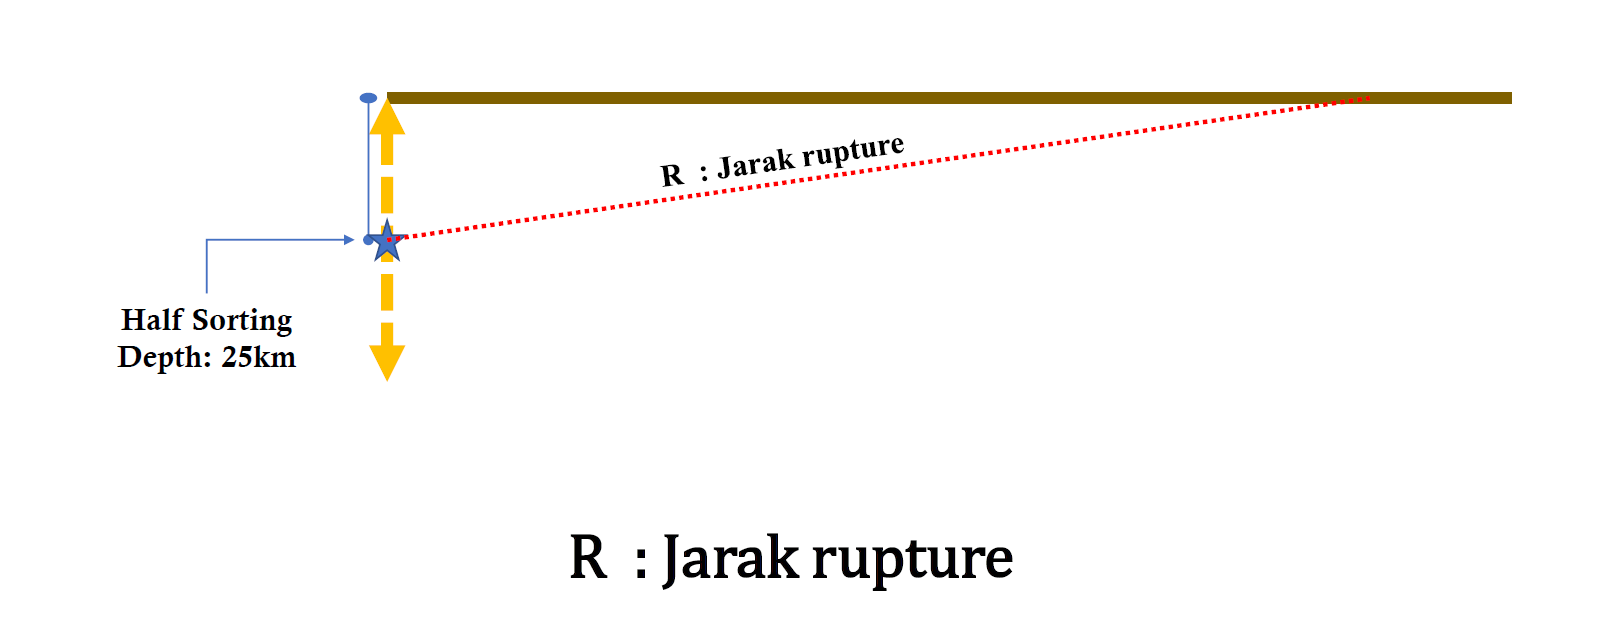

### Display data

In [9]:
# data source
source_df

,source,long,lat,a_rate,z
0,Source 1,106.0,7.4,0.010524,25
1,Source 2,106.6,7.4,0.008314,25
2,Source 3,107.1,8.1,0.007411,25
3,Source 4,105.9,8.8,0.005932,25
4,Source 5,108.1,9.7,0.006490,25


In [10]:
# data titk observasi
tobs_df

,long,lat
0,106.367412,-8.691137


In [11]:
# konversi longitude,latitude

source_df['x'] = source_df.long*111
source_df['y'] = source_df.lat*111

tobs_df['x'] = tobs_df.long*111
tobs_df['y'] = tobs_df.lat*-111

In [12]:
# menampilkan hasil konversi
source_df

,source,long,lat,a_rate,z,x,y
0,Source 1,106.0,7.4,0.010524,25,11766.0,821.4
1,Source 2,106.6,7.4,0.008314,25,11832.6,821.4
2,Source 3,107.1,8.1,0.007411,25,11888.1,899.1
3,Source 4,105.9,8.8,0.005932,25,11754.9,976.8
4,Source 5,108.1,9.7,0.006490,25,11999.1,1076.7


In [13]:
# menampilkan hasil konversi
tobs_df

,long,lat,x,y
0,106.367412,-8.691137,11806.782732,964.716207


In [14]:
# assign data long dan lat titik observasi
x2 = tobs_df.x.values
y2 = tobs_df.y.values

# perhitungan jarak (source-observasi)
source_df['jarak'] = np.sqrt((source_df.x.values - x2)**2 + (source_df.y.values - y2)**2)

# perhitungan R (depth)
source_df['R'] = np.sqrt((source_df.z.values)**2 + (source_df.jarak.values)**2)

# display
source_df

,source,long,lat,a_rate,z,x,y,jarak,R
0,Source 1,106.0,7.4,0.010524,25,11766.0,821.4,149.005927,151.088605
1,Source 2,106.6,7.4,0.008314,25,11832.6,821.4,145.623029,147.753398
2,Source 3,107.1,8.1,0.007411,25,11888.1,899.1,104.489161,107.438283
3,Source 4,105.9,8.8,0.005932,25,11754.9,976.8,53.271343,58.845866
4,Source 5,108.1,9.7,0.006490,25,11999.1,1076.7,222.545055,223.944863


# Perhitungan N (G-R Law)

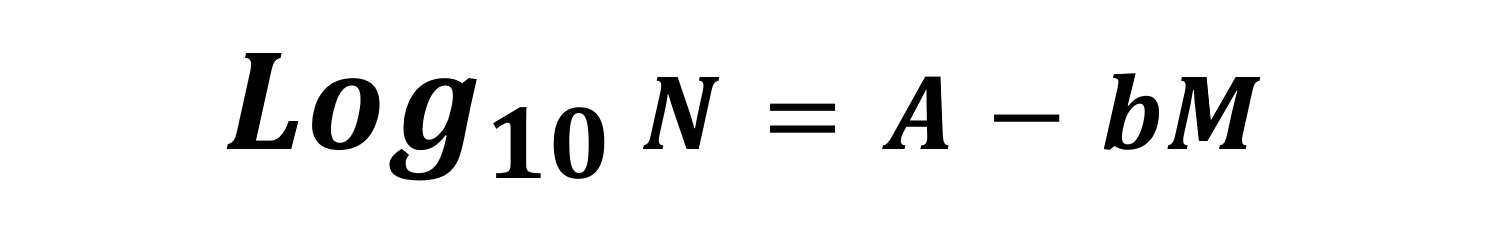

In [15]:
# membuat list magnitude 6-8 dengan increment 0.2
num = [i for i in range(60, 82, 2)]
N = [num / 10 for num in num]

# membuat dataframe baru
N_df = pd.DataFrame(N, columns=['N'])

# membuat list nama kolom baru
list_colname = ['source1', 'source2', 'source3', 'source4', 'source5']

# assignt nama kolom baru ke dataframe N_df
for i in range(len(list_colname)):
    for j in range(len(N_df)):
        N_df[list_colname[i]] = 0

# membuat N menjadi index
N_df.set_index('N', inplace=True)

# melakukan perhitungan menggunakan persamaan G-R
for i in range(5):
    for j in range(11):
        N_df.iloc[j,i] = (source_df.a_rate[i]/(10**(b_value*(N[j]-4.5))))*50

# menampilkan hasil perhitungan
N_df

,source1,source2,source3,source4,source5
N,,,,,
6.0,0.054421,0.042993,0.038323,0.030675,0.033561
6.2,0.040215,0.031770,0.028319,0.022667,0.024800
6.4,0.029717,0.023476,0.020926,0.016750,0.018326
6.6,0.021959,0.017348,0.015464,0.012378,0.013542
6.8,0.016227,0.012819,0.011427,0.009146,0.010007
7.0,0.011991,0.009473,0.008444,0.006759,0.007395
7.2,0.008861,0.007000,0.006240,0.004994,0.005464
7.4,0.006548,0.005173,0.004611,0.003691,0.004038
7.6,0.004838,0.003822,0.003407,0.002727,0.002984


# Perhitungan Probability

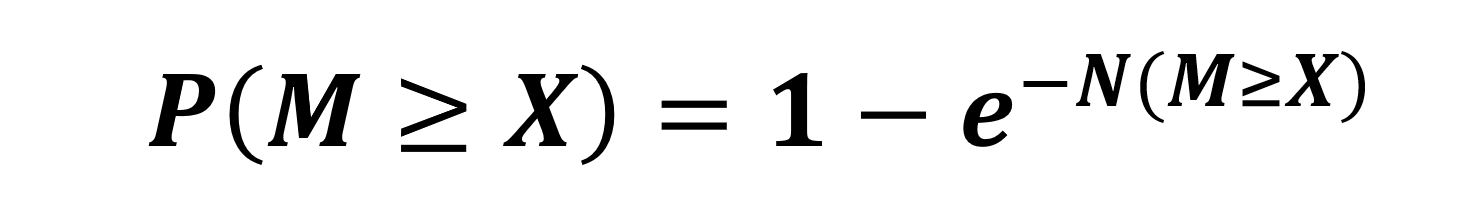

#### dengan, P = probability; M = magnitudo gempa, N = jumlah kejadian gempa

In [16]:
# membuat data frame baru dengan cara copy dari N_df
prob_df = N_df.copy(deep=True)
prob_df = prob_df.reset_index(drop=True)

# melakukan perhitungan probability
for i in range(5):
    for j in range(11):
        prob_df.iloc[j,i] = 1-(np.exp(-N_df.iloc[j,i]))
        
# menampilkan hasil perhitungan        
prob_df

,source1,source2,source3,source4,source5
0,0.052967,0.042082,0.037598,0.030210,0.033004
1,0.039417,0.031270,0.027922,0.022413,0.024495
2,0.029279,0.023203,0.020709,0.016611,0.018159
3,0.021720,0.017198,0.015345,0.012301,0.013451
4,0.016096,0.012737,0.011362,0.009105,0.009957
5,0.011919,0.009428,0.008408,0.006736,0.007367
6,0.008821,0.006975,0.006220,0.004982,0.005449
7,0.006526,0.005159,0.004600,0.003684,0.004030
8,0.004827,0.003815,0.003401,0.002723,0.002979
9,0.003569,0.002820,0.002515,0.002013,0.002202


# Menghitung Total Probability

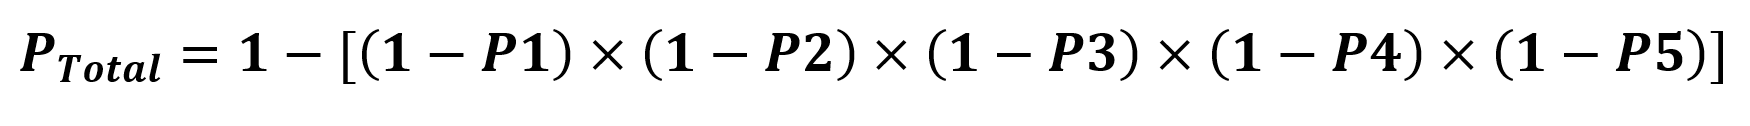

In [17]:
# menghitung probabilitas total
prob_df['prob_total'] = 1-((1-prob_df['source1'])*(1-prob_df['source2'])*
                           (1-prob_df['source3'])*(1-prob_df['source4'])*(1-prob_df['source5']))

In [18]:
# menampilkan hasil perhitungan
prob_df

,source1,source2,source3,source4,source5,prob_total
0,0.052967,0.042082,0.037598,0.030210,0.033004,0.181247
1,0.039417,0.031270,0.027922,0.022413,0.024495,0.137371
2,0.029279,0.023203,0.020709,0.016611,0.018159,0.103445
3,0.021720,0.017198,0.015345,0.012301,0.013451,0.077520
4,0.016096,0.012737,0.011362,0.009105,0.009957,0.057883
5,0.011919,0.009428,0.008408,0.006736,0.007367,0.043104
6,0.008821,0.006975,0.006220,0.004982,0.005449,0.032034
7,0.006526,0.005159,0.004600,0.003684,0.004030,0.023772
8,0.004827,0.003815,0.003401,0.002723,0.002979,0.017621
9,0.003569,0.002820,0.002515,0.002013,0.002202,0.013052


# Perhitungan Peak Ground Acceleration (PGA)

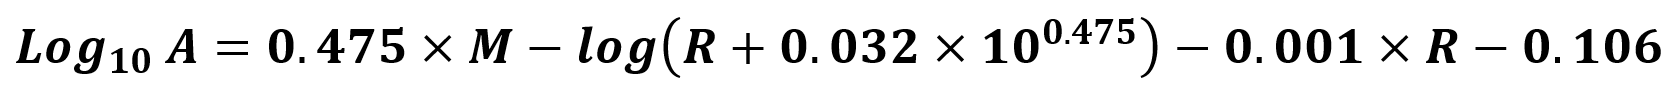

#### dengan, M = magnitude; dan R = jarak rupture

In [19]:
# membuat data frame baru dengan cara copy dari prob_df
pga_df = prob_df.copy(deep=True)
pga_df.drop(columns=['prob_total'], inplace=True)

# melakukan perhitungan pga
for i in range(5):
    for j in range(11):
        pga_df.iloc[j,i] = \
        10**(0.475*N[j] - np.log10(source_df.R[i] + 0.032*10**(0.475)) - 0.001*source_df.R[i] - 0.106)

# menampilkan hasil perhitungan
pga_df

,source1,source2,source3,source4,source5
0,2.590629,2.669491,4.027325,8.217386,1.478185
1,3.224075,3.322220,5.012065,10.226657,1.839623
2,4.012409,4.134552,6.237588,12.727224,2.289438
3,4.993501,5.145510,7.762769,15.839217,2.849239
4,6.214485,6.403662,9.660879,19.712137,3.545919
5,7.734018,7.969451,12.023106,24.532042,4.412948
6,9.625098,9.918098,14.962931,30.530485,5.491978
7,11.978575,12.343218,18.621586,37.995634,6.834847
8,14.907512,15.361316,23.174836,47.286122,8.506067
9,18.552617,19.117382,28.841421,58.848270,10.585925


# Menghitung PGA Total

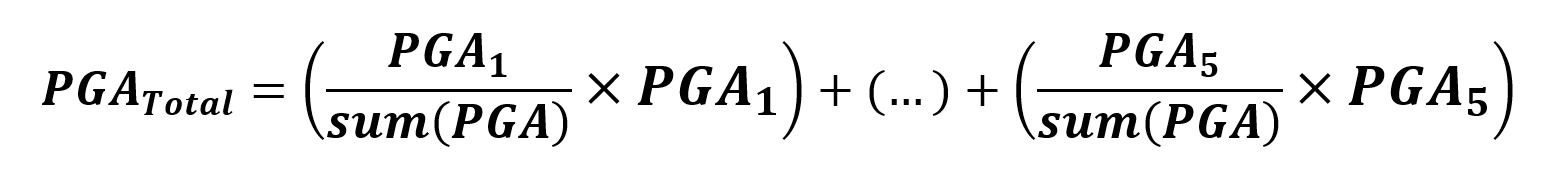

In [20]:
# membuat kolom perhitungan sum
pga_df['sum_pga'] = pga_df.sum(axis = 1)

# melakukan perhitungan total PGA
pga_df['pga_total'] = ((pga_df.source1/pga_df.sum_pga) * pga_df.source1) + ((pga_df.source2/pga_df.sum_pga) * pga_df.source2) + \
                        ((pga_df.source3/pga_df.sum_pga) * pga_df.source3) + ((pga_df.source4/pga_df.sum_pga) * pga_df.source4) + ((pga_df.source5/pga_df.sum_pga) * pga_df.source5)

In [21]:
# menampilkan hasil perhitungan
pga_df

,source1,source2,source3,source4,source5,sum_pga,pga_total
0,2.590629,2.669491,4.027325,8.217386,1.478185,18.983016,5.255611
1,3.224075,3.322220,5.012065,10.226657,1.839623,23.624640,6.540685
2,4.012409,4.134552,6.237588,12.727224,2.289438,29.401210,8.139978
3,4.993501,5.145510,7.762769,15.839217,2.849239,36.590235,10.130322
4,6.214485,6.403662,9.660879,19.712137,3.545919,45.537083,12.607333
5,7.734018,7.969451,12.023106,24.532042,4.412948,56.671565,15.690011
6,9.625098,9.918098,14.962931,30.530485,5.491978,70.528590,19.526447
7,11.978575,12.343218,18.621586,37.995634,6.834847,87.773861,24.300949
8,14.907512,15.361316,23.174836,47.286122,8.506067,109.235853,30.242886
9,18.552617,19.117382,28.841421,58.848270,10.585925,135.945615,37.637714


# Melakukan Plot

### SHF Source 1

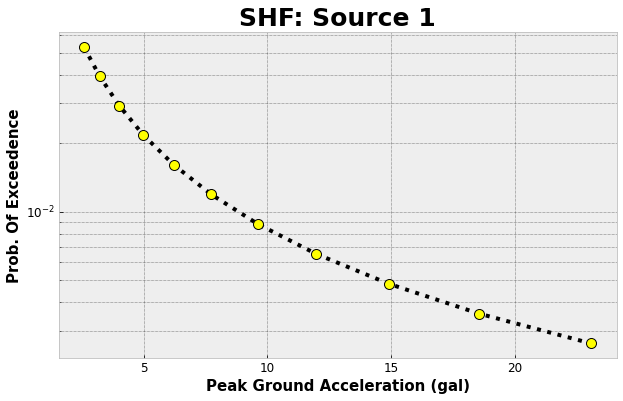

In [22]:
# mengganti ukuran plot
plt.figure(figsize=(10,6))

# melakukan plot
plt.plot(pga_df.source1, prob_df.source1,':', color='black', linewidth=4, markersize=10)
plt.plot(pga_df.source1, prob_df.source1,'o', color='yellow', linewidth=4, markersize=10, markeredgecolor='black')
plt.yscale('log')

# mengubah x tick dan y tick
plt.yticks(size=12)
plt.xticks(size=12)

# membuat title dan label
plt.title("SHF: Source 1", size=25, fontweight='bold')
plt.ylabel('Prob. Of Exceedence', size=15, fontweight='bold')
plt.xlabel("Peak Ground Acceleration (gal)", size=15, fontweight='bold')

# menampilkan grid
plt.grid(visible=True, which='major', color='black', linestyle=':')
plt.grid(visible=True, which='minor', color='black', linestyle=':')

# menyimpan figure
#plt.savefig("shf-source1.png", dpi=720)

# menampilkan plot
plt.show()

### SHF Source 2

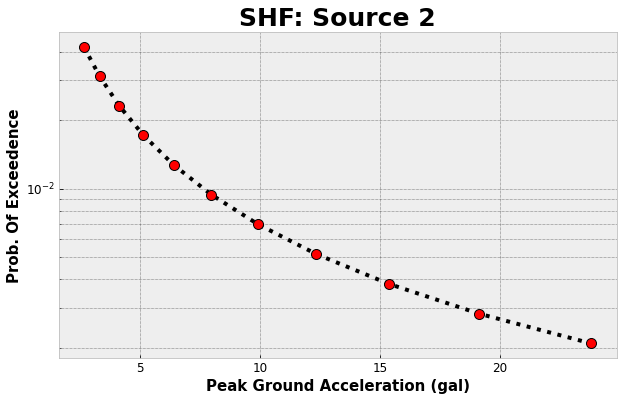

In [23]:
# mengganti ukuran plot
plt.figure(figsize=(10,6))

# melakukan plot
plt.plot(pga_df.source2, prob_df.source2,':', color='black', linewidth=4, markersize=10)
plt.plot(pga_df.source2, prob_df.source2,'o', color='red', linewidth=4, markersize=10, markeredgecolor='black')
plt.yscale('log')

# mengubah x tick dan y tick
plt.yticks(size=12)
plt.xticks(size=12)

# membuat title dan label
plt.title("SHF: Source 2", size=25, fontweight='bold')
plt.ylabel('Prob. Of Exceedence', size=15, fontweight='bold')
plt.xlabel("Peak Ground Acceleration (gal)", size=15, fontweight='bold')

# menampilkan grid
plt.grid(visible=True, which='major', color='black', linestyle=':')
plt.grid(visible=True, which='minor', color='black', linestyle=':')

# menyimpan figure
#plt.savefig("shf-source2.png", dpi=720)

# menampilkan plot
plt.show()

### SHF source 3

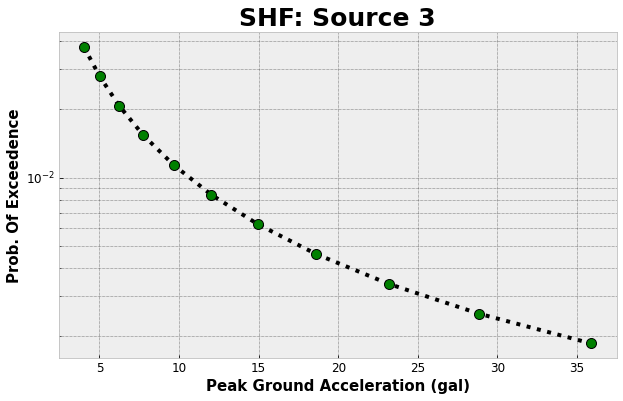

In [24]:
# mengganti ukuran plot
plt.figure(figsize=(10,6))

# melakukan plot
plt.plot(pga_df.source3, prob_df.source3,':', color='black', linewidth=4, markersize=10)
plt.plot(pga_df.source3, prob_df.source3,'o', color='green', linewidth=4, markersize=10, markeredgecolor='black')
plt.yscale('log')

# mengubah x tick dan y tick
plt.yticks(size=12)
plt.xticks(size=12)

# membuat title dan label
plt.title("SHF: Source 3", size=25, fontweight='bold')
plt.ylabel('Prob. Of Exceedence', size=15, fontweight='bold')
plt.xlabel("Peak Ground Acceleration (gal)", size=15, fontweight='bold')

# menampilkan grid
plt.grid(visible=True, which='major', color='black', linestyle=':')
plt.grid(visible=True, which='minor', color='black', linestyle=':')

# menyimpan figure
#plt.savefig("shf-source3.png", dpi=720)

# menampilkan plot
plt.show()

### SHF Source 4

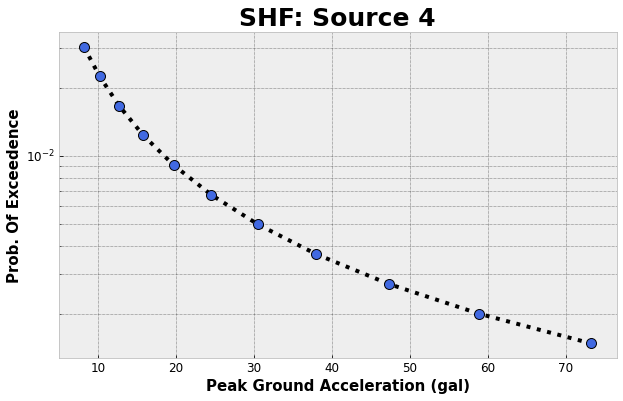

In [25]:
# mengganti ukuran plot
plt.figure(figsize=(10,6))

# melakukan plot
plt.plot(pga_df.source4, prob_df.source4,':', color='black', linewidth=4, markersize=10)
plt.plot(pga_df.source4, prob_df.source4,'o', color='royalblue', linewidth=4, markersize=10, markeredgecolor='black')
plt.yscale('log')

# mengubah x tick dan y tick
plt.yticks(size=12)
plt.xticks(size=12)

# membuat title dan label
plt.title("SHF: Source 4", size=25, fontweight='bold')
plt.ylabel('Prob. Of Exceedence', size=15, fontweight='bold')
plt.xlabel("Peak Ground Acceleration (gal)", size=15, fontweight='bold')

# menampilkan grid
plt.grid(visible=True, which='major', color='black', linestyle=':')
plt.grid(visible=True, which='minor', color='black', linestyle=':')

# menyimpan figure
#plt.savefig("shf-source4.png", dpi=720)

# menampilkan plot
plt.show()

### SHF Source 5

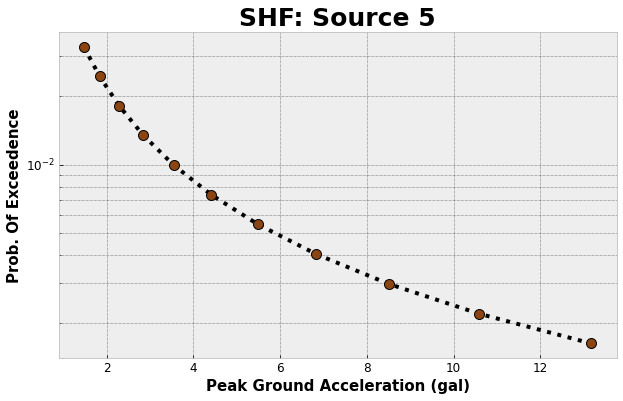

In [26]:
# mengganti ukuran plot
plt.figure(figsize=(10,6))

# melakukan plot
plt.plot(pga_df.source5, prob_df.source5,':', color='black', linewidth=4, markersize=10)
plt.plot(pga_df.source5, prob_df.source5,'o', color='saddlebrown', linewidth=4, markersize=10, markeredgecolor='black')
plt.yscale('log')

# mengubah x tick dan y tick
plt.yticks(size=12)
plt.xticks(size=12)

# membuat title dan label
plt.title("SHF: Source 5", size=25, fontweight='bold')
plt.ylabel('Prob. Of Exceedence', size=15, fontweight='bold')
plt.xlabel("Peak Ground Acceleration (gal)", size=15, fontweight='bold')

# menampilkan grid
plt.grid(visible=True, which='major', color='black', linestyle=':')
plt.grid(visible=True, which='minor', color='black', linestyle=':')

# menyimpan figure
#plt.savefig("shf-source5.png", dpi=720)

# menampilkan plot
plt.show()

### SHF All Seismicity Source (Total)

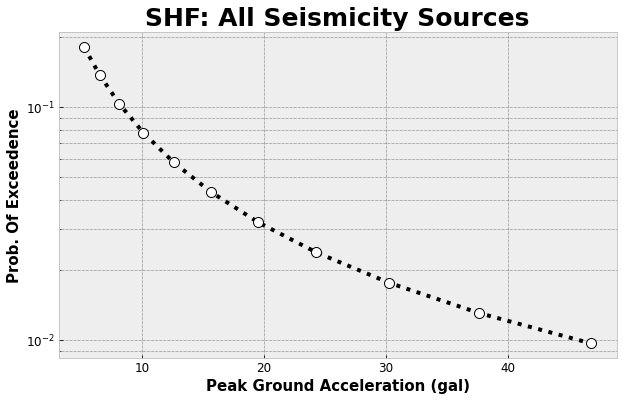

In [27]:
# mengganti ukuran plot
plt.figure(figsize=(10,6))

# melakukan plot
plt.plot(pga_df.pga_total, prob_df.prob_total,':', color='black', linewidth=4, markersize=10)
plt.plot(pga_df.pga_total, prob_df.prob_total,'o', color='white', linewidth=4, markersize=10, markeredgecolor='black')
plt.yscale('log')

# mengubah x tick dan y tick
plt.yticks(size=12)
plt.xticks(size=12)

# membuat title dan label
plt.title("SHF: All Seismicity Sources", size=25, fontweight='bold')
plt.ylabel('Prob. Of Exceedence', size=15, fontweight='bold')
plt.xlabel("Peak Ground Acceleration (gal)", size=15, fontweight='bold')

# menampilkan grid
plt.grid(visible=True, which='major', color='black', linestyle=':')
plt.grid(visible=True, which='minor', color='black', linestyle=':')

# menyimpan figure
#plt.savefig("shf-allsources.png", dpi=720)

# menampilkan plot
plt.show()

### SHF All Plot

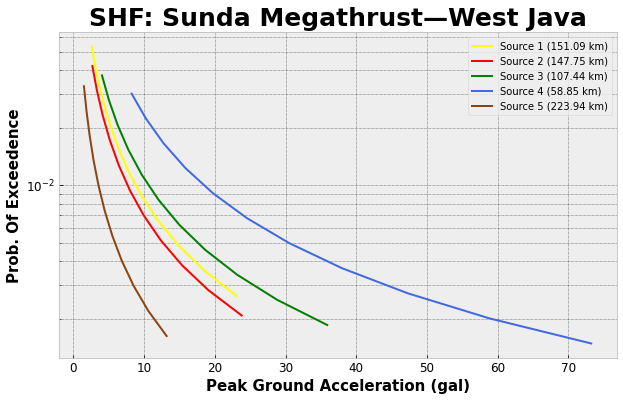

In [28]:
# mengganti ukuran plot
plt.figure(figsize=(10,6))

# melakukan plot
plt.plot(pga_df.source1, prob_df.source1, color='yellow', linewidth=2)
plt.plot(pga_df.source2, prob_df.source2, color='red', linewidth=2)
plt.plot(pga_df.source3, prob_df.source3, color='green', linewidth=2)
plt.plot(pga_df.source4, prob_df.source4, color='royalblue', linewidth=2)
plt.plot(pga_df.source5, prob_df.source5, color='saddlebrown', linewidth=2)

plt.yscale('log')

# mengubah x tick dan y tick
plt.yticks(size=12)
plt.xticks(size=12)

# membuat title dan label
plt.title("SHF: Sunda Megathrust—West Java", size=25, fontweight='bold')
plt.ylabel('Prob. Of Exceedence', size=15, fontweight='bold')
plt.xlabel("Peak Ground Acceleration (gal)", size=15, fontweight='bold')

# menampilkan grid
plt.grid(visible=True, which='major', color='black', linestyle=':')
plt.grid(visible=True, which='minor', color='black', linestyle=':')

# menampilkan legend
plt.legend(['Source 1 ({} km)'.format(round(source_df.R[0], 2)), 'Source 2 ({} km)'.format(round(source_df.R[1], 2))
            , 'Source 3 ({} km)'.format(round(source_df.R[2], 2)), 'Source 4 ({} km)'.format(round(source_df.R[3], 2)), 
            'Source 5 ({} km)'.format(round(source_df.R[4], 2))])

# menyimpan figure
#plt.savefig("shf-allplot.png", dpi=720)

# menampilkan plot
plt.show()